In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Load the dataset
df = pd.read_csv("/home/inventor/Datasets/Loan Eligible dataset/loan_data_eligibility/loan-train.csv")
loan_test = pd.read_csv("/home/inventor/Datasets/Loan Eligible dataset/loan_data_eligibility/loan-test.csv")

In [149]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
df.shape, loan_test.shape

((614, 13), (367, 12))

In [151]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [152]:
# Descriptive stataistics of the train dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [153]:
# Information about the trian dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [154]:
# Check for missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Exploratory Data Analysis (EDA_)
In this section, we will perfom some expolartory data analysis (EDA) to understand the dataset better.

First of all we will check the distribution of the all features in the dataset.

In [155]:
def explore_data(df, feature_name):

    """
    Function tot explore the value counts of a feature in the dataset
    """

    if df[feature_name].dtype == "object":

        print(df[feature_name].value_counts())


In [156]:
# Let test the function with a feature

explore_data(df, "Gender")

Gender
Male      489
Female    112
Name: count, dtype: int64


In [157]:
# Now for all feature in the data

for featureName in df.columns:

    if df[featureName].dtype == "object":

        print(f"\n {str(featureName)} Value counts are : ")
        explore_data(df, featureName)


 Loan_ID Value counts are : 
Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

 Gender Value counts are : 
Gender
Male      489
Female    112
Name: count, dtype: int64

 Married Value counts are : 
Married
Yes    398
No     213
Name: count, dtype: int64

 Dependents Value counts are : 
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

 Education Value counts are : 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

 Self_Employed Value counts are : 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

 Property_Area Value counts are : 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

 Loan_Status Value counts are : 
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [158]:
# Now handle missing values in th dataset
import missingno as msno

In [159]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

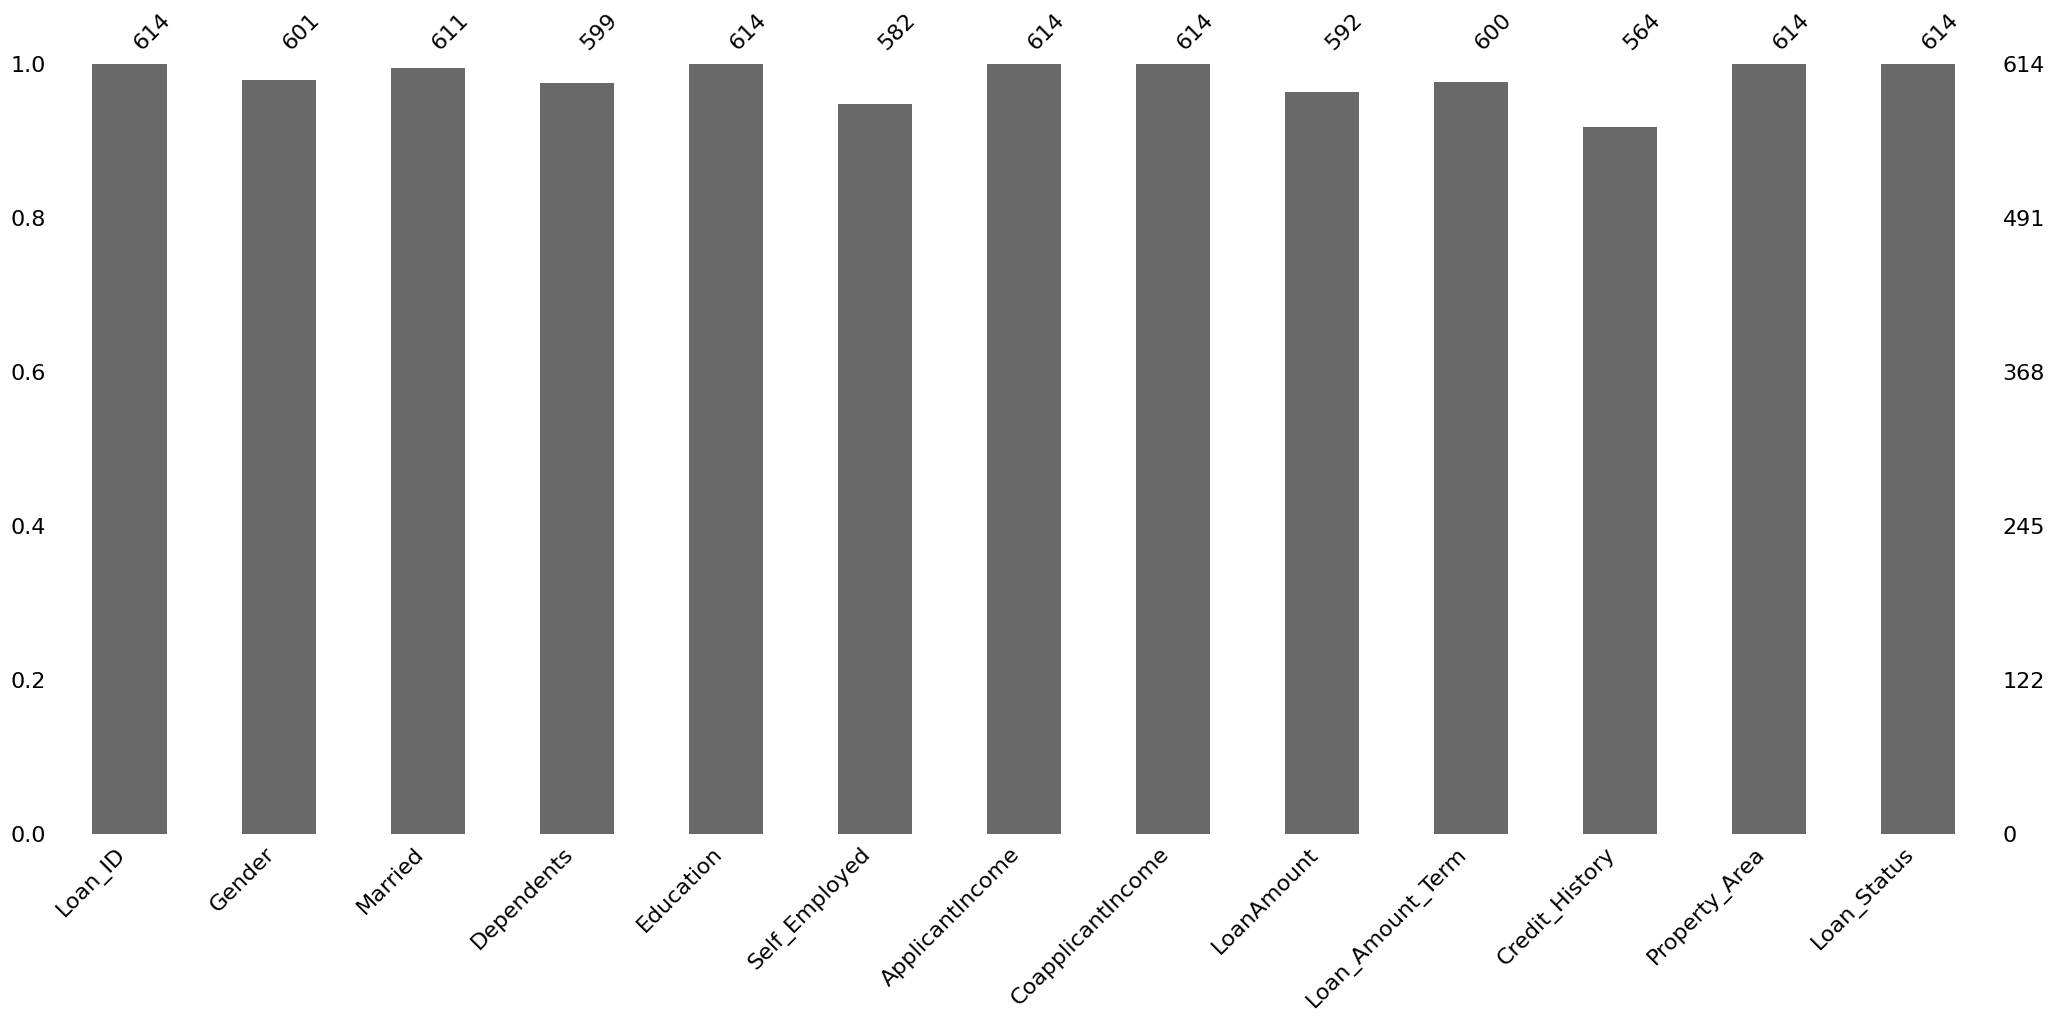

In [160]:
msno.bar(df)

<Axes: >

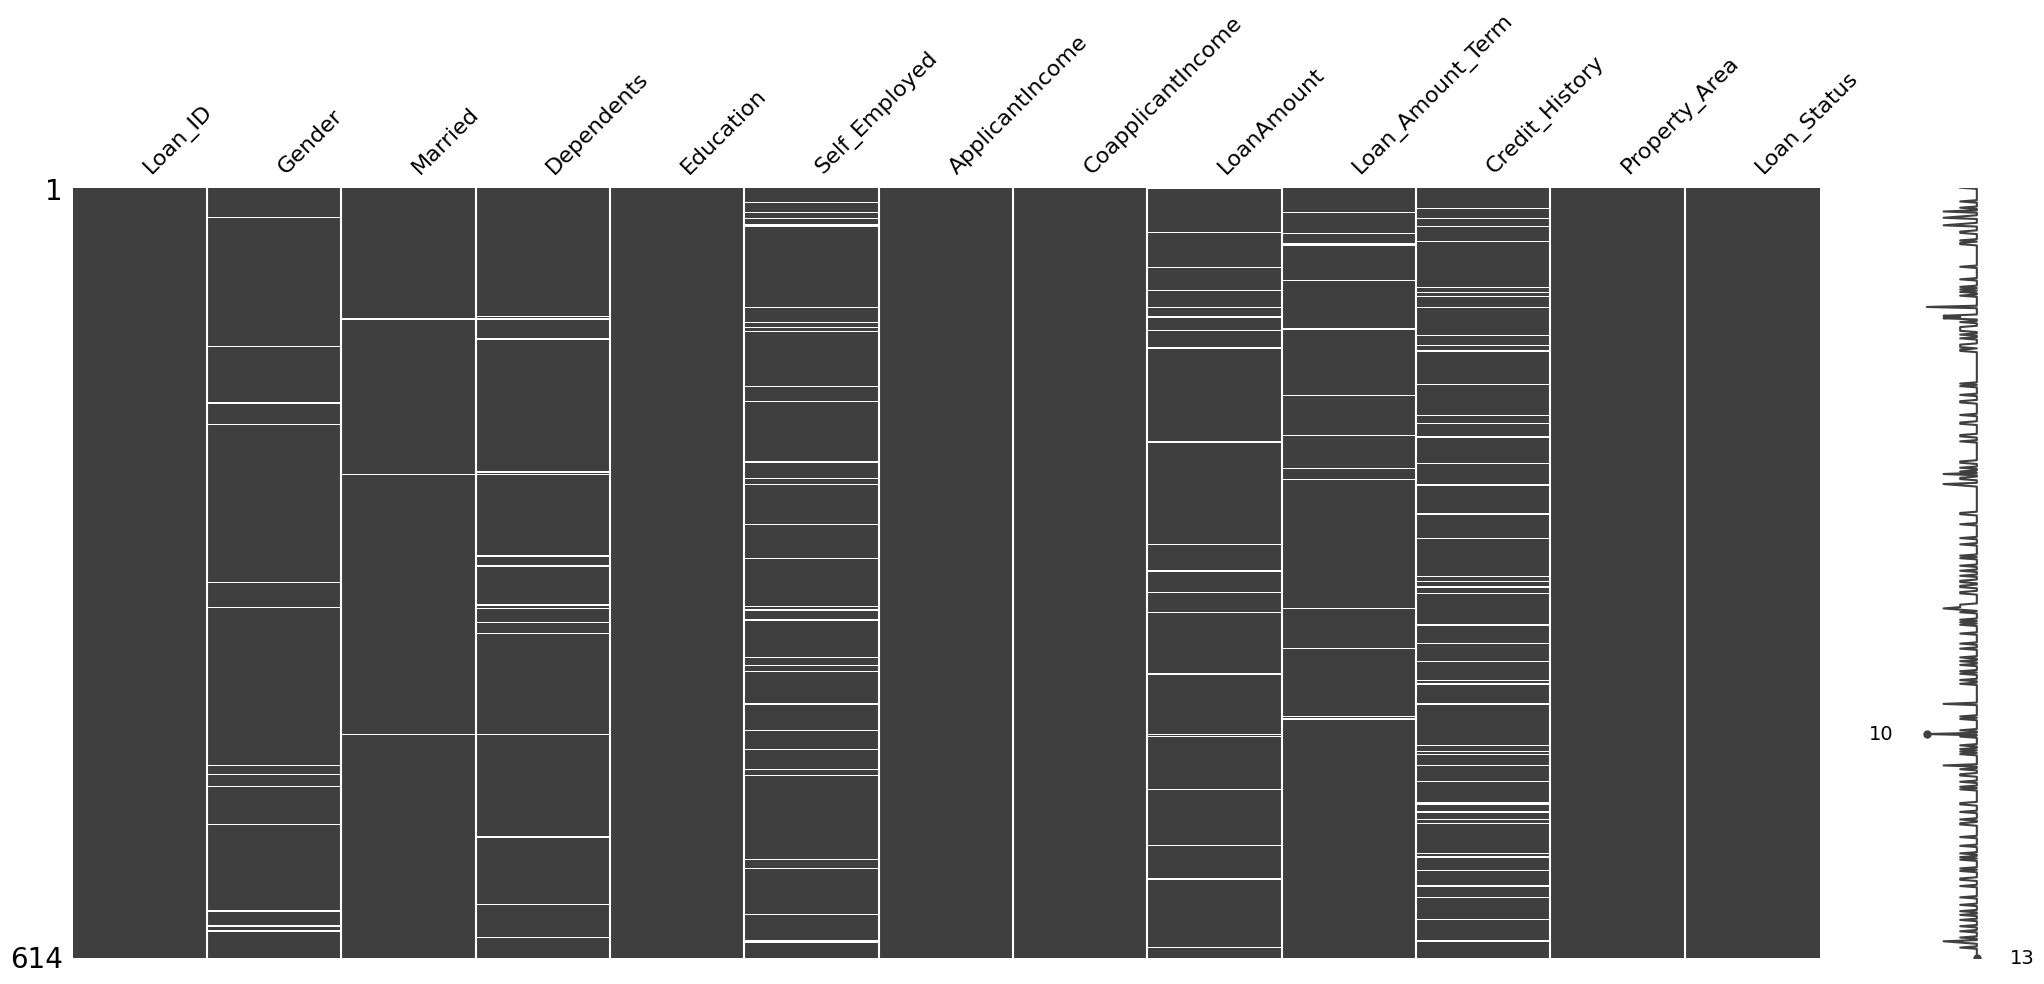

In [161]:
msno.matrix(df)

In [162]:
print(f"Missing values :\n {df.isnull().sum()}, \nDtype :\n {df.dtypes}")

Missing values :
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64, 
Dtype :
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [163]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [164]:
# Fill the misisng values 

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

loan_test["Gender"] = loan_test["Gender"].fillna(loan_test["Gender"].mode()[0])
loan_test["Married"] = loan_test["Married"].fillna(loan_test["Married"].mode()[0])
loan_test["Dependents"] = loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0])
loan_test["LoanAmount"] = loan_test["LoanAmount"].fillna(loan_test["LoanAmount"].mean())
loan_test["Loan_Amount_Term"] = loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].mode()[0])
loan_test["Self_Employed"] = loan_test["Self_Employed"].fillna(loan_test["Self_Employed"].mode()[0])
loan_test["Credit_History"] = loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0])


In [166]:
df.isnull().sum(), loan_test.isnull().sum()

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64)

In [109]:
# Check the duplicates value in the dataset

df.duplicated().sum()

np.int64(0)

In [171]:
# Remove the useless feature in the dataset

df =  df.drop("Loan_ID", axis=1)

In [172]:
loan_test = loan_test.drop("Loan_ID", axis=1)

### Data Visulization

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Distibution of Loan Status')

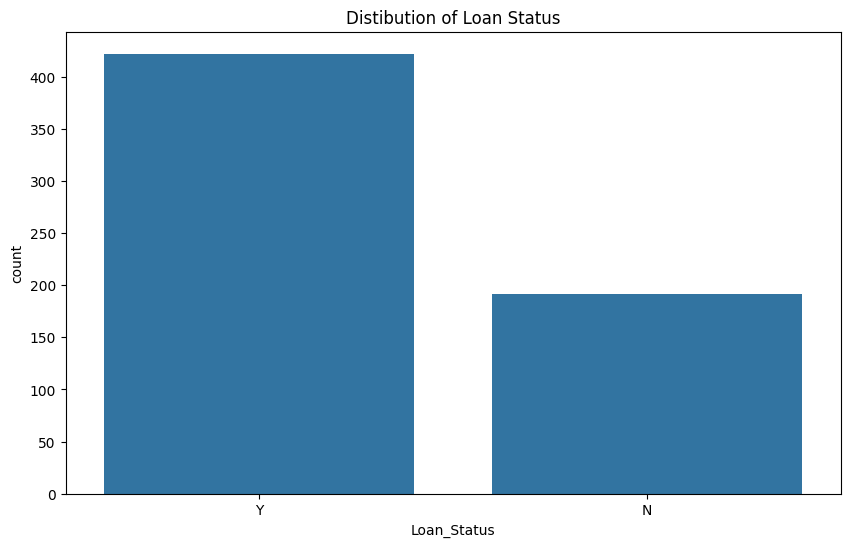

In [47]:
# Disribution of the target variable

plt.figure(figsize=(10, 6))
sns.countplot(x=df["Loan_Status"])
plt.title("Distibution of Loan Status")

In [52]:
df["LoanAmount"].value_counts()

LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
187.000000    12
              ..
292.000000     1
142.000000     1
350.000000     1
496.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

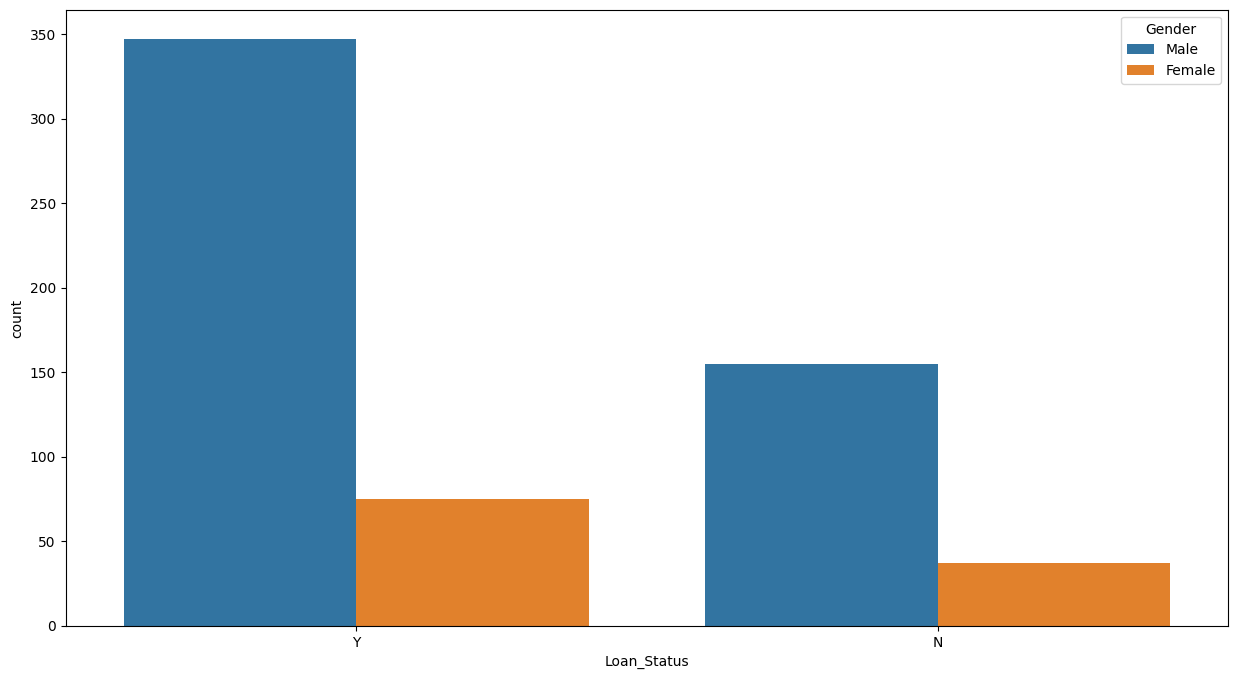

In [59]:
# Distribution of Loan Status between Genders

plt.figure(figsize=(15, 8))
sns.countplot(x=df["Loan_Status"], hue=df["Gender"])

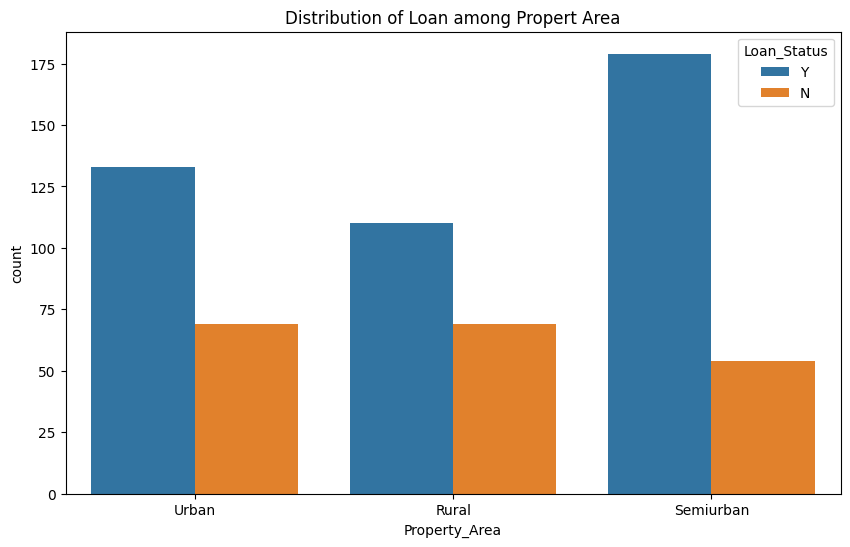

In [62]:
# Distribution of loan among Area
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Property_Area"], hue=df["Loan_Status"])
plt.title("Distribution of Loan among Propert Area")
plt.show()

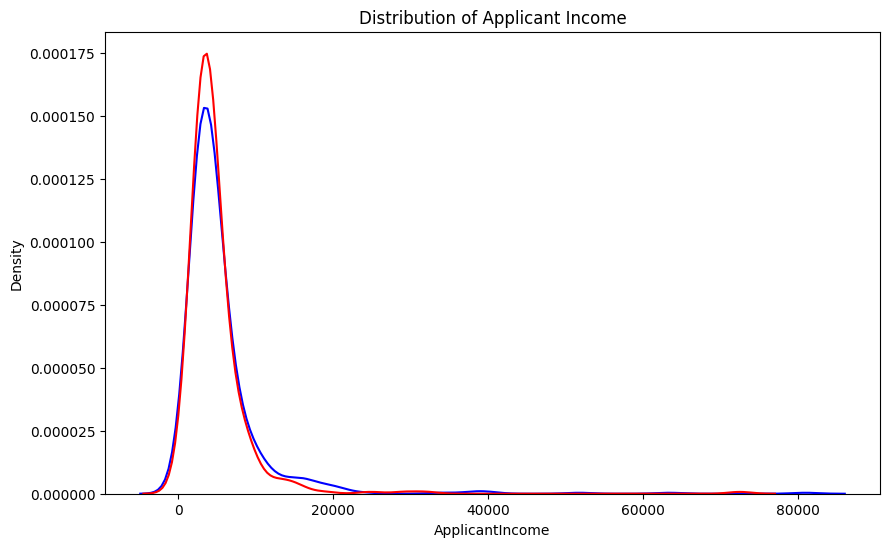

In [77]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["ApplicantIncome"], color="blue")
sns.kdeplot(loan_test["ApplicantIncome"], color="red")
plt.title("Distribution of Applicant Income")
plt.show()

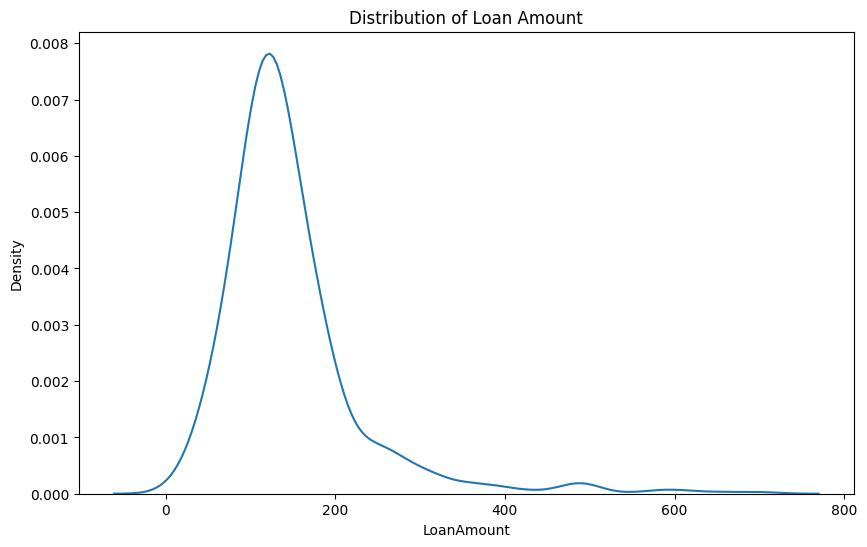

In [78]:
# Distribution of the Loan Amount

plt.figure(figsize=(10, 6))
sns.kdeplot(df["LoanAmount"])
plt.title(f"Distribution of Loan Amount")
plt.show()

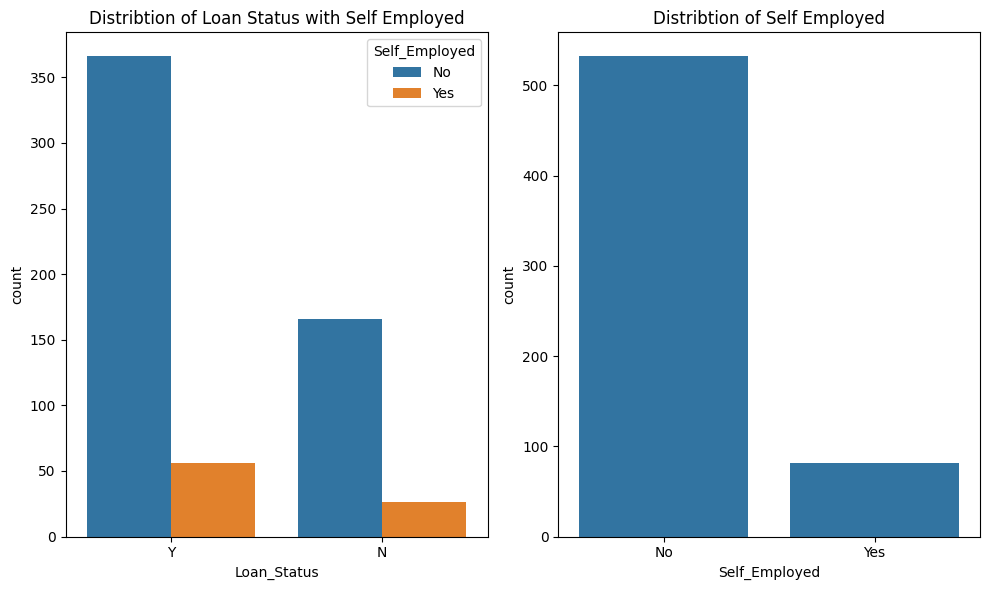

In [79]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df["Loan_Status"], hue=df["Self_Employed"])
plt.title("Distribtion of Loan Status with Self Employed")


plt.subplot(1, 2, 2)
sns.countplot(x=df["Self_Employed"])
plt.title("Distribtion of Self Employed")
plt.tight_layout()
plt.show()


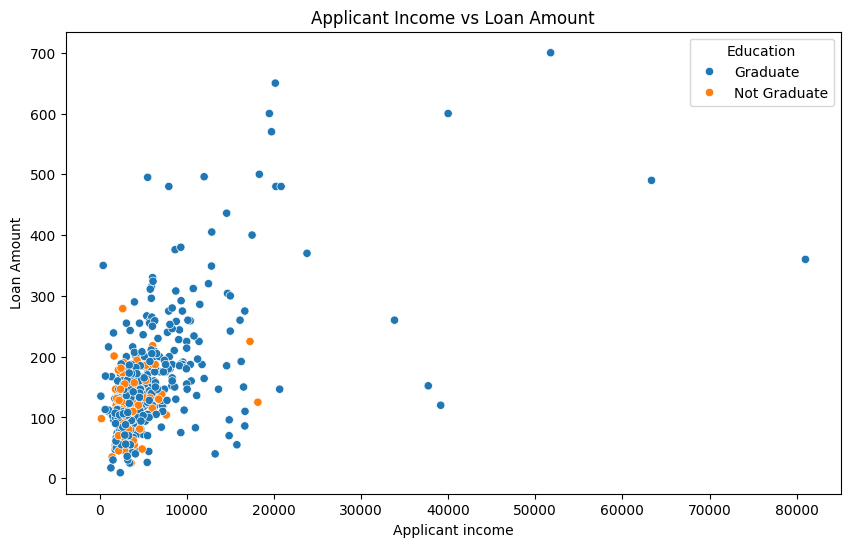

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["ApplicantIncome"], y=df["LoanAmount"], hue=df["Education"])
plt.xlabel("Applicant income")
plt.ylabel("Loan Amount")
plt.title("Applicant Income vs Loan Amount")
plt.show()

In [111]:
num_features = [feature for feature in df.columns if df[feature].dtype in [int, float]]
cat_features = [feature for feature in df.columns if df[feature].dtype not in [int, float]]

num_features, cat_features

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

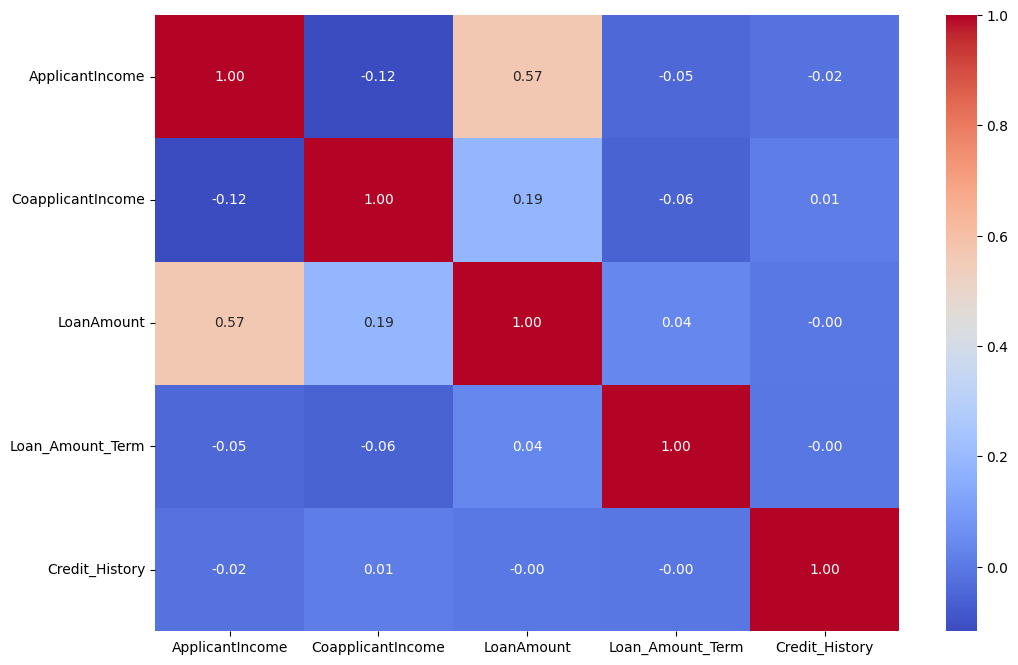

In [112]:
corr_ = df[num_features].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [173]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Encoding & Normalization

In [168]:
from sklearn.preprocessing import LabelEncoder

In [194]:
# Label Encoder 
label_encoder = LabelEncoder()

df["Loan_Status"] = label_encoder.fit_transform(df["Loan_Status"])

In [195]:
df.Gender = df.Gender.replace({"Male" : 1, "Female":0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female":0})

df.Married = df.Married.replace({"Yes" : 1, "No":0})
loan_test.Married = loan_test.Married.replace({"Yes" : 1, "No" : 0})

df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes" : 1, "No" : 0})

In [197]:
loan_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [198]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [182]:
df.shape, loan_test.shape

((614, 12), (367, 11))

In [184]:
features_cols = ["Property_Area", "Education", "Dependents"]
for col in features_cols:

    df[col] = label_encoder.fit_transform(df[col])

In [215]:
test_cols = ["Education", "Property_Area", "Dependents"]

for col in test_cols:

    loan_test[col] = label_encoder.fit_transform(loan_test[col])

In [216]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [200]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [201]:
num_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [202]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

In [204]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2,1


### Train the Model 
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine 
- Naive Byes Classifer


In [209]:
X_train = df.drop("Loan_Status", axis=1)
y_train = df["Loan_Status"]

In [223]:
y_test = y_train.copy()

y_test = y_test.sample(n=367, random_state=42)

In [210]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2,1


In [224]:
from sklearn.linear_model import LogisticRegression
logistic_ = LogisticRegression()

logistic_.fit(X_train, y_train)

LogisticRegression()

In [225]:
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [218]:
loan_test["Dependents"].value_counts()

Dependents
0    210
2     59
1     58
3     40
Name: count, dtype: int64

In [226]:
y_pred_log = logistic_.predict(loan_test)

In [227]:
from sklearn.metrics import accuracy_score, f1_score

ac_logistic = accuracy_score(y_test, y_pred_log)
f1_score_logistic = f1_score(y_test, y_pred_log)

print(f"Accuracy Score Logistic : {ac_logistic:.2f}%")
print(f"F1 Score Logistic : {f1_score_logistic:.2f}%")

Accuracy Score Logistic : 0.50%
F1 Score Logistic : 0.57%


In [232]:
from sklearn.tree import DecisionTreeClassifier

tree_ = DecisionTreeClassifier(max_depth=5)

tree_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [233]:
y_pred_tree = tree_.predict(loan_test)

In [234]:
acc_score_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print(f"Accuracy Score Tree : {acc_score_tree:.2f}%")
print(f"F1 Score Tree : {f1_score_tree:.2f}%")

Accuracy Score Tree : 0.56%
F1 Score Tree : 0.67%


In [238]:
from sklearn.ensemble import RandomForestClassifier 

forest_ = RandomForestClassifier(n_estimators=100)

forest_.fit(X_train, y_train)

RandomForestClassifier()

In [240]:
y_pred_forest = forest_.predict(loan_test)

In [241]:
acc_score_forest = accuracy_score(y_test, y_pred_forest)
f1_score_forest = f1_score(y_test, y_pred_forest)

print(f"Accuracy Score Forest : {acc_score_forest:.2f}%")
print(f"F1 Score Forest : {f1_score_forest:.2f}%")

Accuracy Score Forest : 0.45%
F1 Score Forest : 0.43%


In [242]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(X_train, y_train)

LinearSVC()

In [243]:
y_pred_svm = svm.predict(loan_test)

In [244]:
acc_score_svm = accuracy_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy Score SVM : {acc_score_svm:.2f}%")
print(f"F1 Score SVM : {f1_score_svm:.2f}%")

Accuracy Score SVM : 0.48%
F1 Score SVM : 0.55%


In [247]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

bernb_ = BernoulliNB()
gaussian_ = GaussianNB()

bernb_.fit(X_train, y_train)
gaussian_.fit(X_train, y_train)

GaussianNB()

In [248]:
y_pred_bernb = bernb_.predict(loan_test)
y_pred_gaussian_ = gaussian_.predict(loan_test)


In [251]:
acc_score_bernb = accuracy_score(y_test, y_pred_bernb)
acc_score_gaussian = accuracy_score(y_test, y_pred_gaussian_)

f1_score_bernb = f1_score(y_test, y_pred_bernb)
f1_score_gaussian_ = f1_score(y_test, y_pred_gaussian_)

print(f"Accuracy Score BERNB : {acc_score_bernb:.2f}%")
print(f"Accuracy Score Gaussian : {acc_score_gaussian:.2f}%")

print(f"F1 Score BERNB : {f1_score_bernb:.2f}%")
print(f"F1 Score Gaussian : {f1_score_gaussian_}")

Accuracy Score BERNB : 0.63%
Accuracy Score Gaussian : 0.32%
F1 Score BERNB : 0.76%
F1 Score Gaussian : 0.0
